<a href="https://colab.research.google.com/github/Hlamulo1/Research-on-ensemble-methods/blob/main/XG_Boost_Ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
/content/drive/My Drive/MalwareData
drebin.csv  kronodroid.csv  malgenome.csv  MalwareData.csv  TUANDROMD.csv
The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features


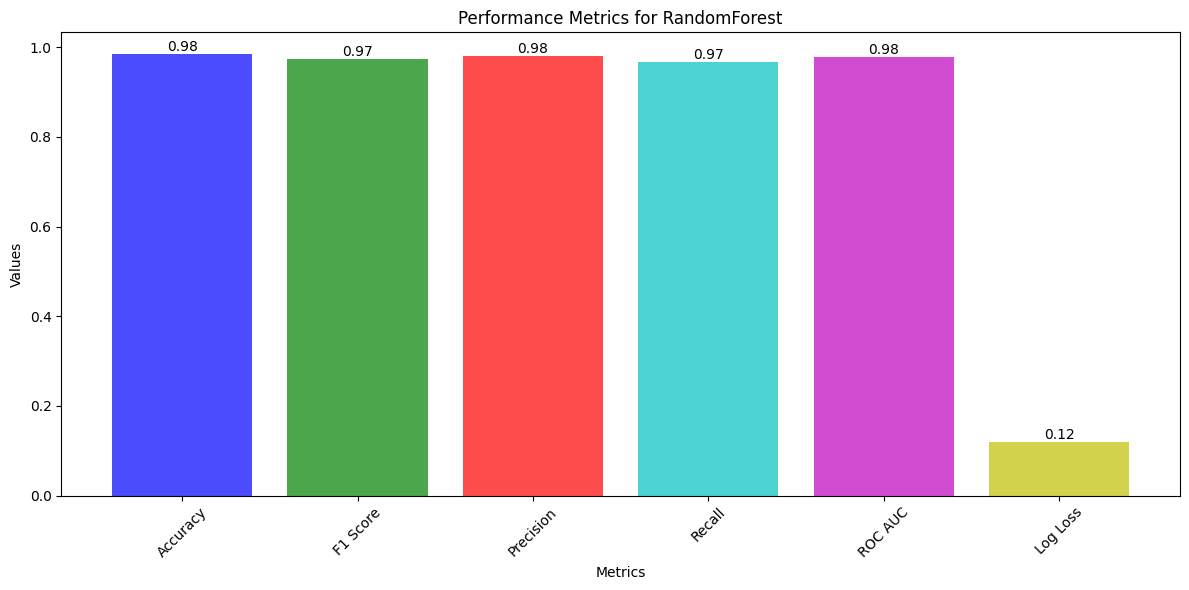

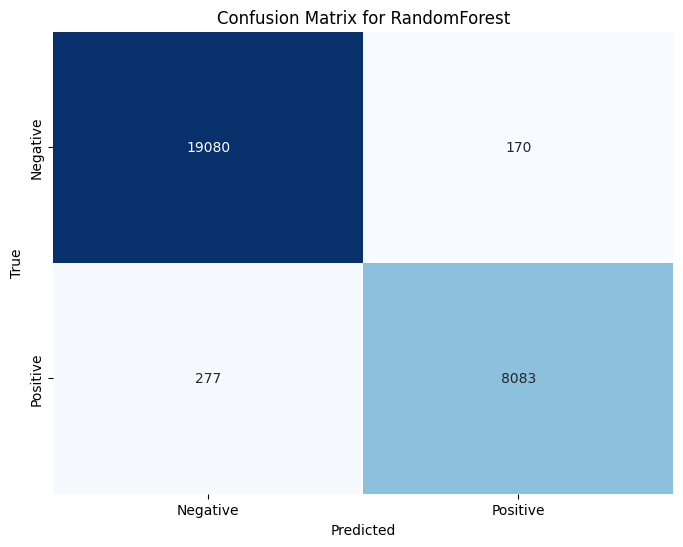

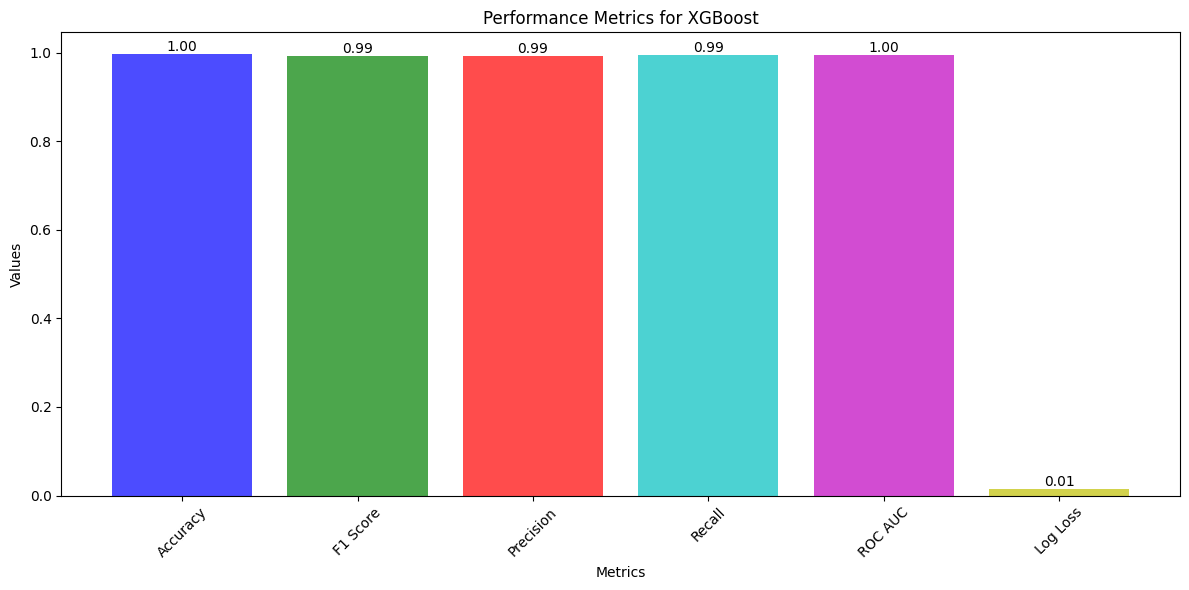

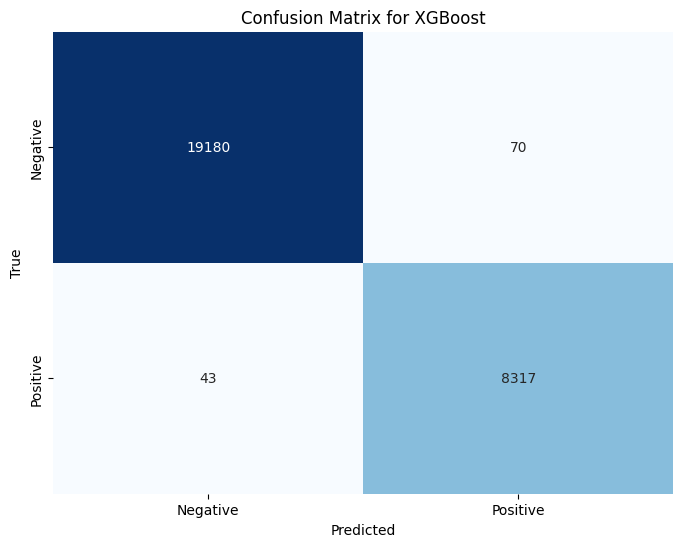

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, log_loss
from sklearn.base import clone
import xgboost as xgb

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
randomModel = clf.fit(X_train, y_train)

# Predictions on the test data
prediction = randomModel.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, randomModel.predict_proba(X_test))

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)

# Create a bar chart with different colors for each metric for RandomForest
metrics_rf = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
values_rf = [accuracy, f1, precision, recall, roc_auc, logloss]
colors_rf = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(12, 6))
plt.bar(metrics_rf, values_rf, color=colors_rf, alpha=0.7)

# Display the actual values on top of each bar
for i, v in enumerate(values_rf):
    plt.text(i, v, '{:.2f}'.format(v), ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for RandomForest')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap to visualize the confusion matrix for RandomForest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForest')
plt.show()

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)

# Predictions on the test data using XGBoost
xgb_prediction = xgb_model.predict(X_test)

# Calculate metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)
xgb_precision = precision_score(y_test, xgb_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
xgb_roc_auc = roc_auc_score(y_test, xgb_prediction)
xgb_logloss = log_loss(y_test, xgb_model.predict_proba(X_test))

# Calculate the confusion matrix for XGBoost
xgb_confusion_mat = confusion_matrix(y_test, xgb_prediction)

# Create a bar chart with different colors for each metric for XGBoost
metrics_xgb = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
values_xgb = [xgb_accuracy, xgb_f1, xgb_precision, xgb_recall, xgb_roc_auc, xgb_logloss]
colors_xgb = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(12, 6))
plt.bar(metrics_xgb, values_xgb, color=colors_xgb, alpha=0.7)

# Display the actual values on top of each bar
for i, v in enumerate(values_xgb):
    plt.text(i, v, '{:.2f}'.format(v), ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for XGBoost')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap to visualize the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')
plt.show()

